# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare the KS test to visual approaches for checking normality assumptions
* Plot the CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import necessary libraries and generate some data 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

In [28]:
np.sort(x_10)

array([-6.55696281, -5.77544421, -3.47220577, -2.16711406, -1.72400535,
       -1.43502271, -1.39429342, -0.51945627,  0.64912106,  1.01164622])

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


[-2.16711406 -1.72400535 -0.51945627 -5.77544421 -1.39429342 -6.55696281
 -1.43502271  0.64912106  1.01164622 -3.47220577]


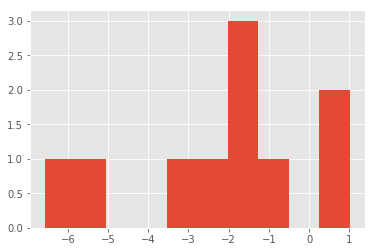

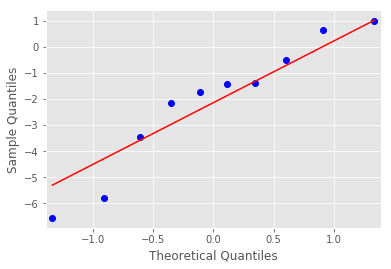

[ 1.4644635   5.25727251  6.056311    1.9649946  -1.23752738  0.50379947
 -2.59387155  1.19662796 -3.7090545   0.39640884  5.50467214  3.54450438
  3.01155233 -6.23715048  1.27348388 -1.73597099  0.59400627  5.90974319
 -2.92717939  2.72440826  0.56060424 -3.04108248 -4.34814854 -1.44281668
 -1.63031836 -4.98353845  0.69474518 -5.43771849  2.23657422 -0.54144364
  5.28806138  1.39313359  0.30554151  2.15700793  0.18901459  3.27639401
 -0.39979771 -6.4094222   0.04980426  5.15859907 -0.78823326  0.92337298
 -2.27992764  6.94619788  1.34308883 -1.69398305 -0.43980549  2.56821694
  1.55097544  5.0418977 ]


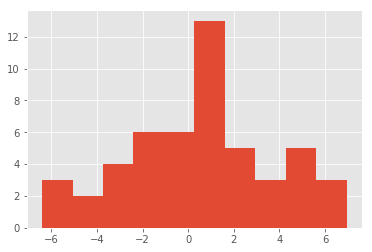

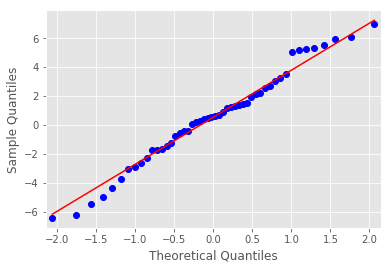

[ 4.09235562 -5.87490115  1.06920359  1.61069099  0.66118802 -1.17058286
 -0.78587399  5.91986918 -2.66423904 -2.94123836  1.64592267  3.91862947
  4.62271107 -4.52461482  1.65154812  0.25243855 -4.46630115 -3.67664487
  1.65948326 -0.02948827  3.44556613 -0.27102677 10.12229888  1.31021129
 -2.75542327 -1.55399455 -1.65605798  2.45608923  6.07874986  0.90240134
 -5.17540436  4.53214155  2.91453971  1.96154215  1.93985584 -2.63453586
  5.19599172  4.60495588  0.65029635  4.04334666  2.11103844 -3.89370864
 -2.40766342  1.32219683  0.42801256 -0.90080819 -2.29009923 -1.71319322
  2.94028366 -2.61220195 -0.46135367 -3.77616673  0.98016272 -3.47766856
 -4.52713952 -5.2292031  -1.89623136 -1.99011774  2.1556601  -2.98864717
 -0.79606412  7.02403654 -3.74345322 -3.79084673 -4.65522065  2.87007148
 -4.65692033 -0.41709482  3.6508346  -5.17087361 -1.42649479  4.52299019
 -1.34181793 -3.37709039  0.47651494 -3.65629719 -2.34555825 -1.18234918
 -3.25343164 -2.684664    1.73390022 -1.11571553 -5

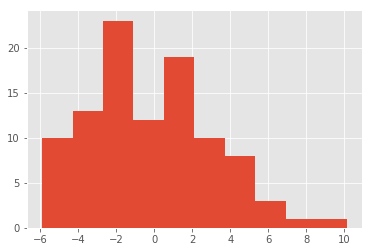

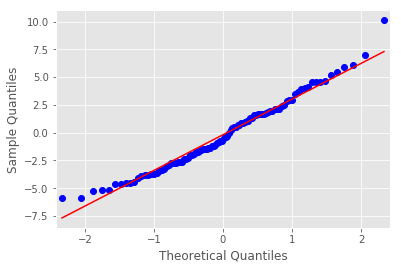

[ 7.43240081e-01  1.39023790e+00  1.93847198e+00  3.38491686e+00
 -7.33341922e-02  6.28242293e-01 -2.19585830e-01 -4.31225784e-01
 -8.12237173e-02  2.64007380e+00 -2.31574649e+00 -2.73690925e+00
  1.09462236e-01 -5.89058071e-01  3.19327396e+00  8.96713596e-01
  1.31227300e-01  7.42281297e+00 -1.57433619e+00  2.64425944e+00
 -4.54589178e+00 -4.38721815e+00 -5.33748293e+00 -5.31882707e+00
  3.18568006e+00  1.93471578e+00  2.80262943e+00 -2.42438663e+00
 -1.08362403e-01 -2.57513800e+00  9.43823619e-01  4.19711880e+00
  4.91150506e+00 -2.00326182e+00  3.37154981e+00  6.64433069e+00
 -1.42685335e-01  1.37147547e+00 -8.92938365e-01  4.12762604e+00
  9.17715929e-01 -5.94201306e-01  1.45638294e-01 -2.44137045e+00
 -3.60930898e-01 -5.98558111e-01 -2.13353791e+00 -5.48363984e-01
  1.96478539e-01 -1.61492137e+00 -7.17168762e-01 -1.74532829e+00
  9.01516126e-01 -2.75378030e+00 -1.94888521e-01 -7.83482091e-01
  2.17506703e+00  3.37744397e+00  1.35638688e+00 -1.48184010e+00
 -3.56277675e+00 -8.88444

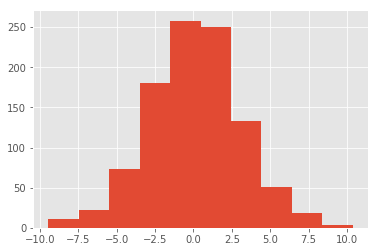

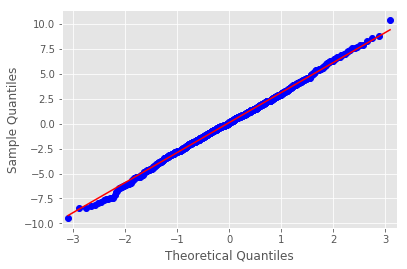

In [2]:
# Plot histograms and QQplots for above datasets
X = [x_10, x_50, x_100, x_1000]
for ind, i in enumerate([x_10, x_50, x_100, x_1000]):
    print(X[ind])
    plt.hist(i)
    sm.qqplot(i, line = 's')
    plt.show()
# You code here

In [ ]:
# You comments here 
#there seems to be some outliers in our data but it's not clear whether is is normal or not
#the qqplots show that there might be normality in these data sets 

### Creat a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3 , having the same number of values as data

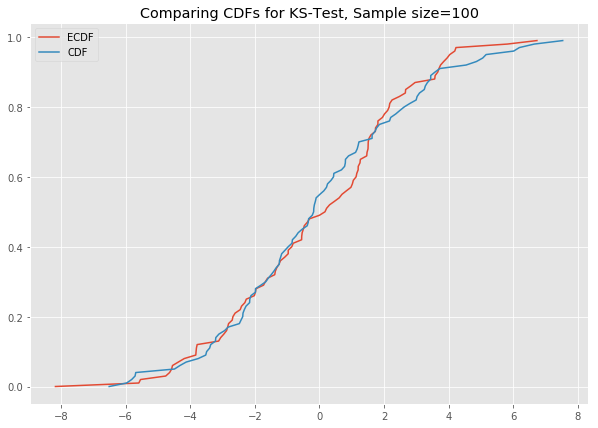

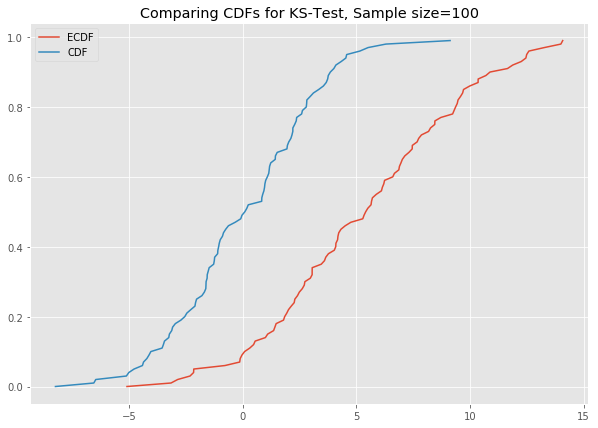

In [9]:
# You code here 

def ks_plot(data):

    plt.figure(figsize=(10, 7))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDFs for KS-Test, Sample size=' + str(len(data)))
    

ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between two cdfs in the second plot show that sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

None
None
None
None


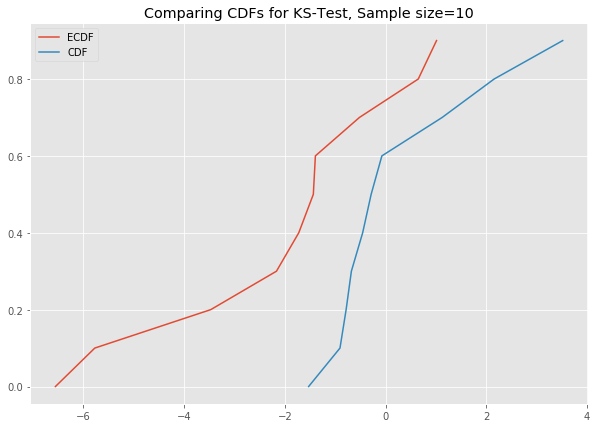

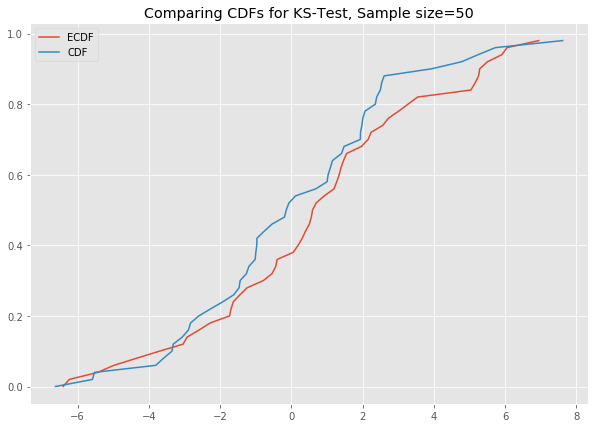

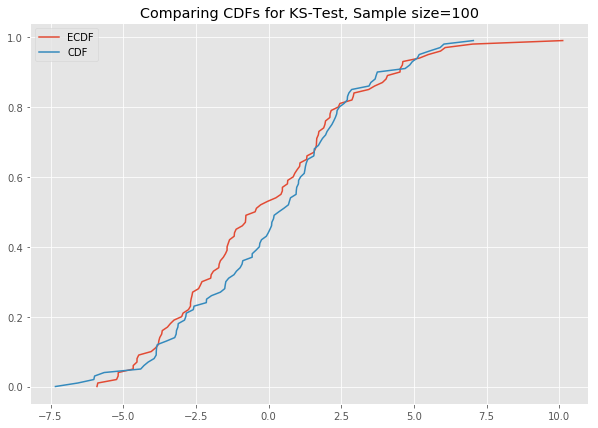

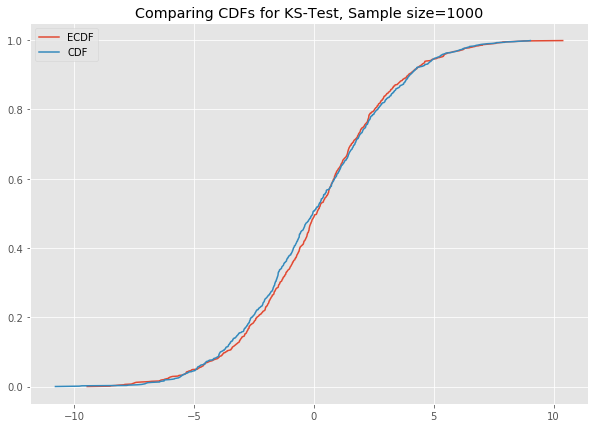

In [10]:
# Your code here 
print(ks_plot(x_10))
print(ks_plot(x_50))
print(ks_plot(x_100))
print(ks_plot(x_1000))

In [ ]:
# Your comments here 
# as the sample size grows larger, the cdf and ecdf get closer, this may mean the KS test gets smaller

### KS test in SciPy

Lets run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run the KS test for normality assumption using the datasets created earlier and comment on the output
- Perform the KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution.

In [13]:
# Perform KS test 
np.random.seed(999)
for i in [x_10, x_50, x_100, x_1000]:
    print(stats.kstest(i, 'norm', args =(0,3)))
# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.3789499337003784, pvalue=0.08453822088693341)
KstestResult(statistic=0.12662270444401702, pvalue=0.370316014609533)
KstestResult(statistic=0.10501827433280336, pvalue=0.20529667454673084)
KstestResult(statistic=0.030681021288378574, pvalue=0.29821637323390116)


In [ ]:
# Your comments here 
# All the p-values are greater than the alpha value 0.05
# This means we can fail to reject the null hypothesis (our sample is identical to a normal distribution)


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [20]:
# Try with a uniform distribution
x_uni = np.random.rand(1000)
print(stats.kstest(x_uni, lambda x: x))
print(stats.kstest(x_uni, 'norm', args=(0, 3)))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.03523781819690697, pvalue=0.16301839932805717)
KstestResult(statistic=0.5000285749629829, pvalue=0.0)


In [ ]:
# Your comments here 
# The uniform distribution's p-value is greater than 0.05, which means we failed to reject the null hypothesis
# The normal distribution's p-value is less than 0.05, which means we reject the null hypothesis
# This makes sense because our hypothesis is whether we have a normal distribution or not

## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

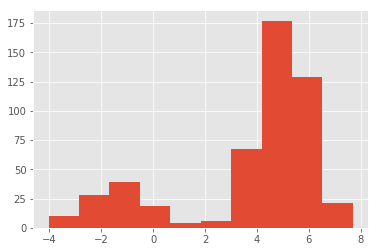

In [21]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

### Plot the CDFs for x_1000_bimodal and x_1000 and comment on the output 

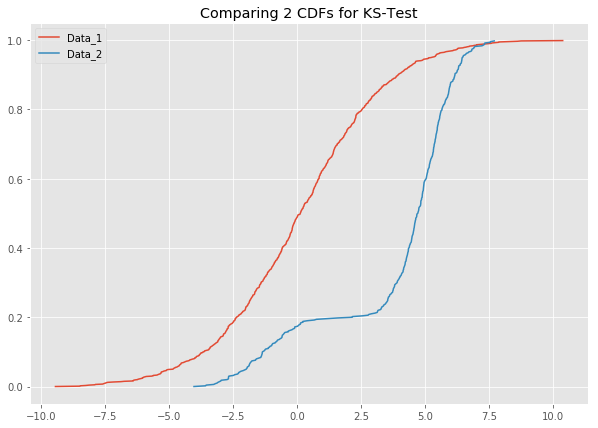

In [27]:

# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    plt.figure(figsize= (10, 7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint = False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint = False))
    plt.legend('top right')
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing 2 CDFs for KS-Test')

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# You comments here 
# the two curves diverge a lot and we can expect a large d statistic value

### Run the two sample KS test on x_1000 and x_1000_bi and comment on the results

In [25]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi[:,0])
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.638, pvalue=6.563393967873706e-120)

In [ ]:
# Your comments here 
# The p-value is very small so with great confidence we can reject the null hypothesis
# The two samples belong to 2 different samples


## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 